In [1]:
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
sales = pd.read_csv('C:\\Users\\Factory\\Desktop\\Decision Trees\\Company_Data.csv')

In [3]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
sales.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
sales1 = encoder.fit_transform(sales)

C:\Users\Factory\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [7]:
sales_val = []
for value in sales["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
sales1["sales_val"]= sales_val

In [8]:
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
x = sales1.drop(['sales_val','Sales'], axis =1)
y = sales1['sales_val']

In [10]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2


In [11]:
y.head(10)

0    high
1    high
2    high
3     low
4     low
5    high
6     low
7    high
8     low
9     low
Name: sales_val, dtype: object

In [14]:
y.value_counts()

low     201
high    199
Name: sales_val, dtype: int64

In [15]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [16]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test))
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train))

Test data Accuracy is: 0.675
Train data Accuracy is: 0.784375


In [18]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [19]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test))
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train))

Test data Accuracy is: 0.65
Train data Accuracy is: 0.8125


In [20]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [21]:
#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test))
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train))

Test data Accuracy is: 0.6875
Train data Accuracy is: 0.909375


In [22]:
model4 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [23]:
#Predicting on test data
pred_test4 = model4.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test4==y_test))
#Predicting on train data
pred_train4 = model4.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train4==y_train))

Test data Accuracy is: 0.7
Train data Accuracy is: 0.91875


In [24]:
#We get the best test results at Iteration-2 max depth = 5. so we will consider that final

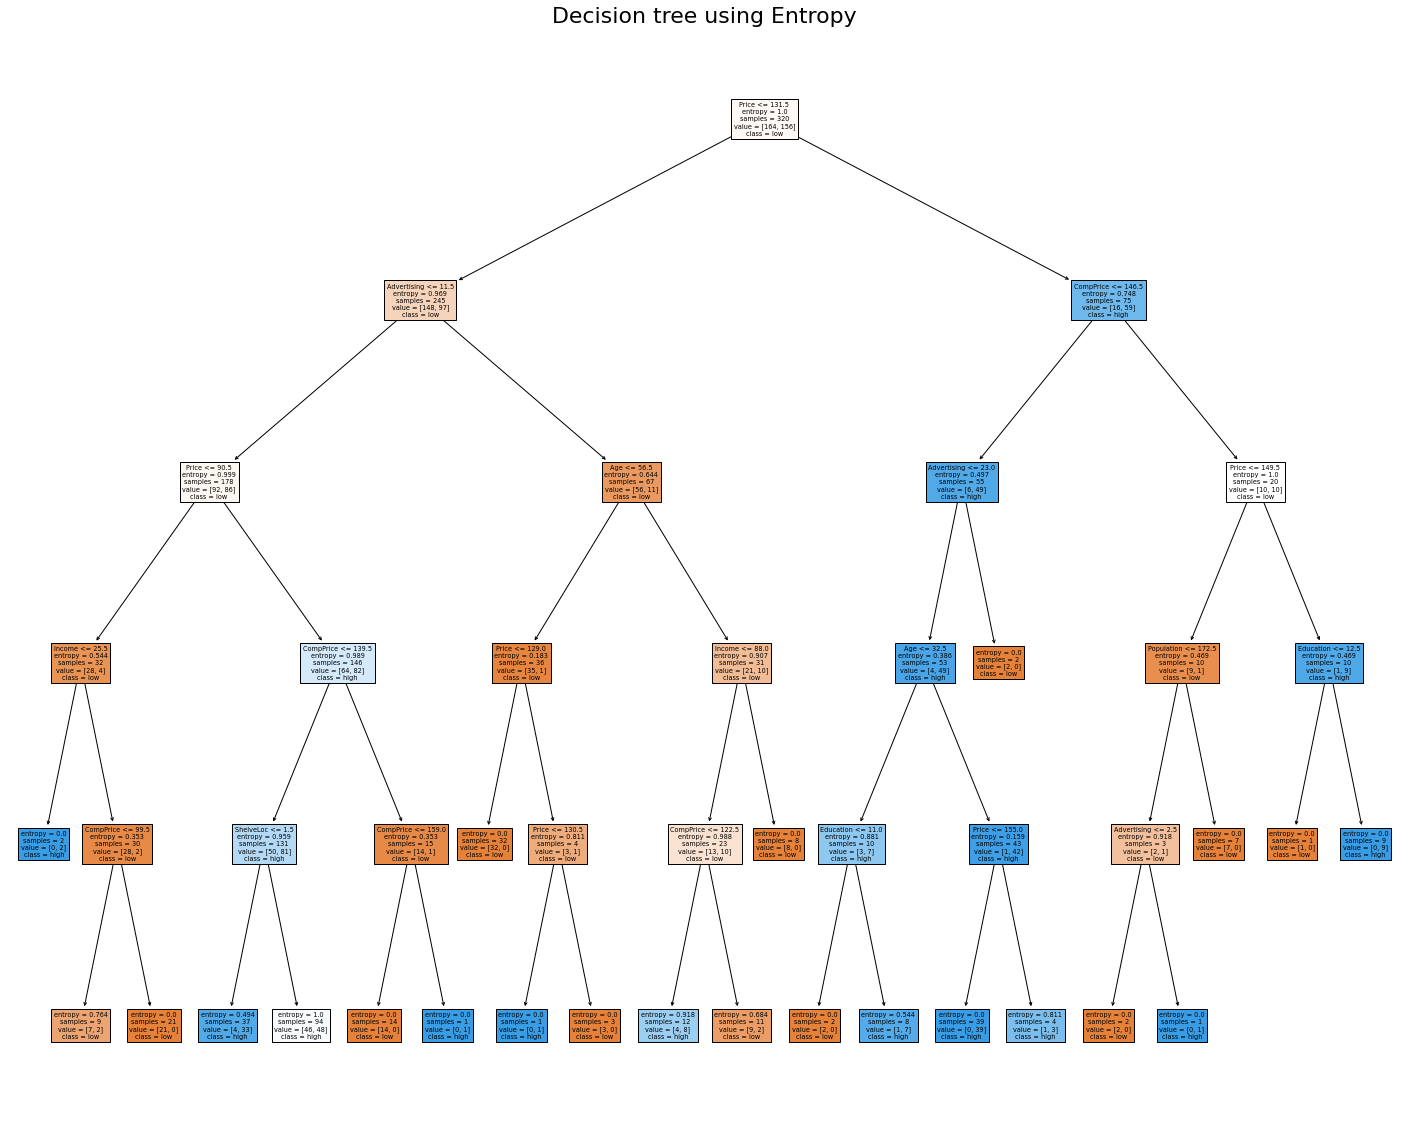

In [25]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model2,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.pdf')

From the above decision tree 3 most important features affecting the sales are -
1) Price

2) Advertising

3) Comp Price

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test))
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train))

Test data Accuracy is: 0.7625
Train data Accuracy is: 0.8875


In [28]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [29]:
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test))
#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train))

Test data Accuracy is: 0.6875
Train data Accuracy is: 0.925


In [30]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [32]:
#Predicting on test data
pred_testg3 = model_gini3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg3==y_test))
#Predicting on train data
pred_traing3 = model_gini3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing3==y_train))

Test data Accuracy is: 0.6625
Train data Accuracy is: 0.971875


In [33]:
#We get the best test results at Iteration-1 max depth = 5. so we will consider that final

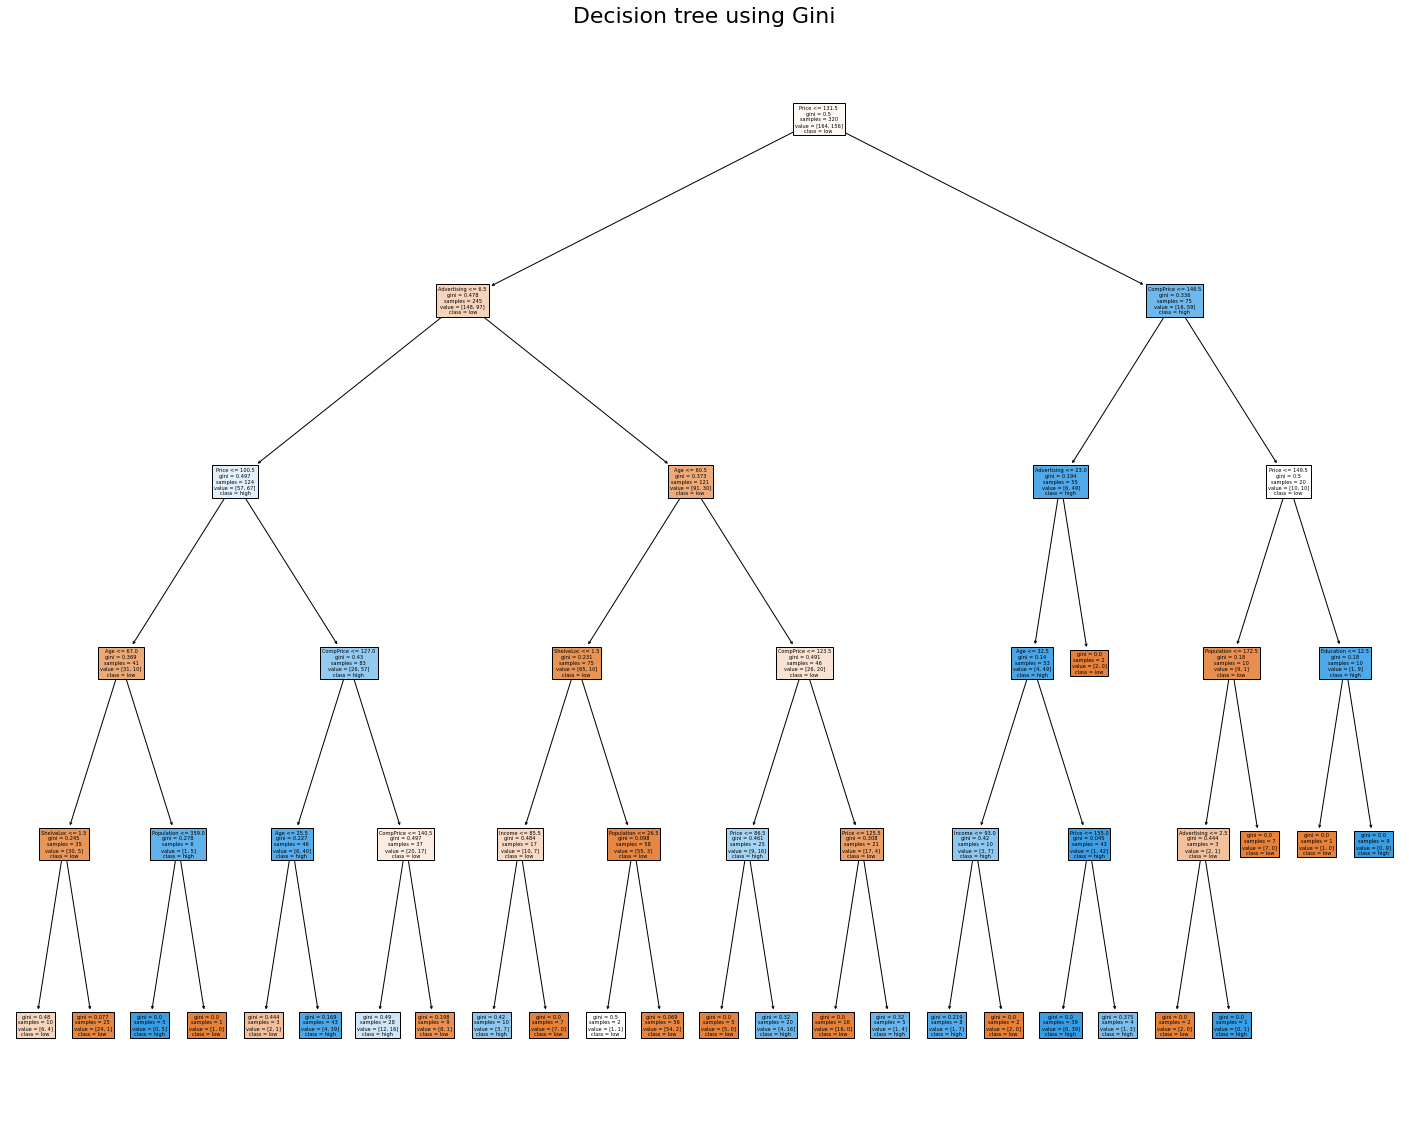

In [34]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini1,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)
plt.savefig('DT_Gini.pdf')

From the above decision tree 3 most important features affecting the sales are
1) Price

2) Advertising

3) Comp Price

Hence it is concluded that both Entropy and Gini criteria gives us best result at max depth = 5 and 3 most importand features for both is same